In [44]:
#read the housing data
import sklearn
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
print( 'The scikit learn version is {}.'.format(sklearn.__version__))
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
             'python-machine-learning-book-2nd-edition'
             '/master/code/ch10/housing.data.txt',
             sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
             'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()






The scikit learn version is 0.21.2.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


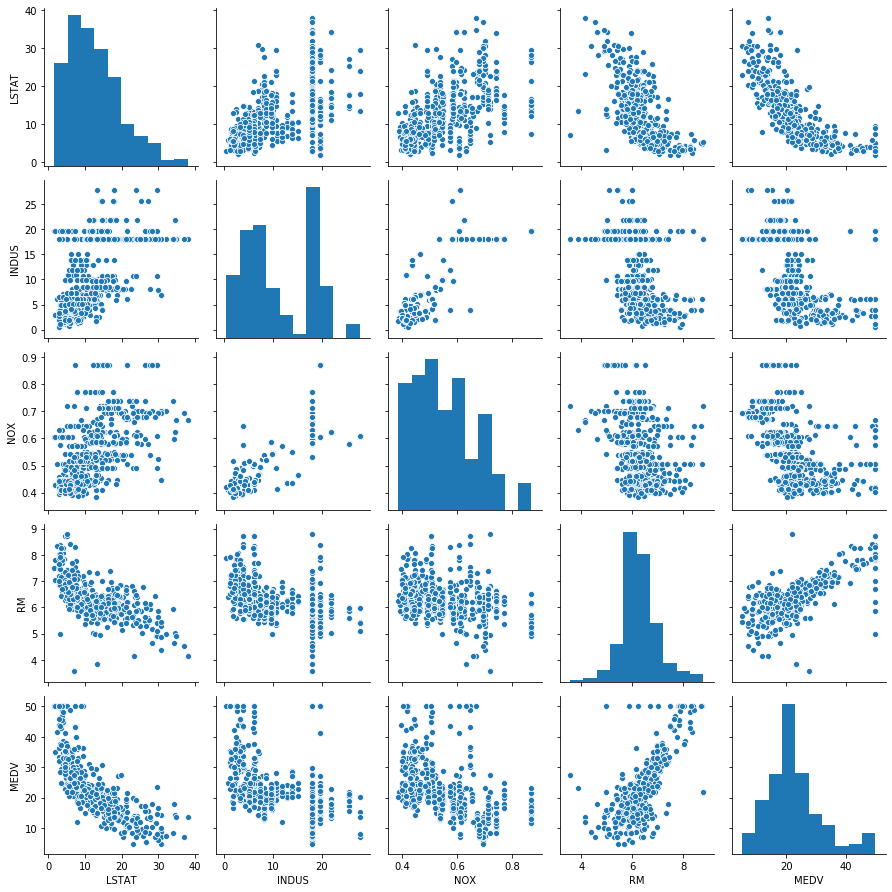

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

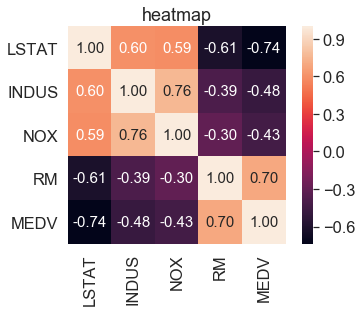

In [12]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)
plt.title('heatmap')
plt.show()

In [49]:
#Fit a linear model using SKlearn to all of the features of the dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lng = LinearRegression()
X, y = df.iloc[:,0:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
lng.fit(X_train,y_train)
y_test_pred = lng.predict(X_test)
y_train_pred = lng.predict(X_train)
print('Coefficients:',lng.coef_)
print('Intercept: %.3f' % lng.intercept_)


Coefficients: [-9.86419414e-02  3.55088661e-02  2.01858184e-02  2.48715542e+00
 -1.80404571e+01  4.08855060e+00  8.37000947e-03 -1.46405699e+00
  2.96233583e-01 -1.14529048e-02 -1.00176249e+00  1.20647494e-02
 -5.54132250e-01]
Intercept: 34.561


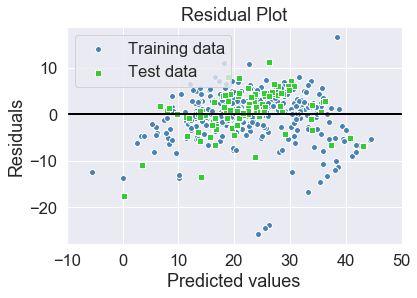

In [50]:
#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Residual Plot')
plt.show()

In [51]:
#calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))


MSE train: 22.743, test: 19.379
R^2 train: 0.751, test: 0.652


Coefficients: [-9.46152272e-02  3.70086448e-02 -1.44201051e-02  2.28727762e+00
 -9.94836967e+00  4.14009938e+00  1.65392946e-03 -1.34480902e+00
  2.78733260e-01 -1.21506010e-02 -9.05567797e-01  1.24701877e-02
 -5.68872130e-01]
Intercept: 28.821


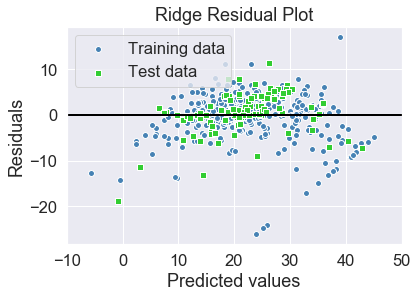

MSE train: 22.943, test: 19.484
R^2 train: 0.748, test: 0.650


In [64]:
#Fit a Ridge model using SKlearn to all of the features of the dataset, alpha = 1
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
print('Coefficients:',ridge.coef_)
print('Intercept: %.3f' % ridge.intercept_)

#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Ridge Residual Plot')
plt.show()

#Calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#We can see R2 are lower than the original linear regression model but MSE are higher
#Means ridge model performs worse than linear regression model on test data at alpha = 1.0

Coefficients: [-6.07598572e-02  3.70032352e-02 -6.78390022e-04  0.00000000e+00
 -0.00000000e+00  1.40716238e+00  2.79860571e-02 -6.71993647e-01
  2.54076302e-01 -1.40982784e-02 -7.36991571e-01  1.12745270e-02
 -7.99985931e-01]
Intercept: 37.318


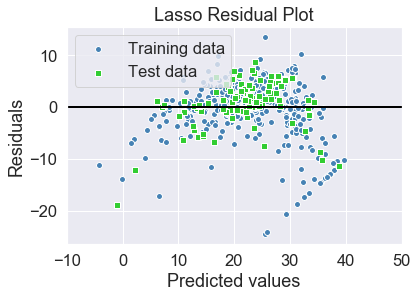

MSE train: 27.425, test: 20.742
R^2 train: 0.699, test: 0.628


In [65]:
#Fit a Lasso model using SKlearn to all of the features of the dataset, alpha = 1.0
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
print('Coefficients:',lasso.coef_)
print('Intercept: %.3f' % lasso.intercept_)

#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Lasso Residual Plot')
plt.show()

#Calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#Lasso model performs worse than linear regression model on test data when alpha = 1

In [66]:
best_alpha = 0
best_r2 = 0
for i in range(0,100):
    lasso = Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    y_test_pred = lasso.predict(X_test)
    if r2_score(y_test, y_test_pred) > best_r2:
        best_r2 = r2_score(y_test, y_test_pred)
        best_alpha = i
print('Best Alpha for Lasso =', best_alpha)

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4594.011365968085, tolerance: 3.685384324257426
  positive)


Best Alpha for Lasso = 0


In [67]:
best_alpha = 0
best_r2 = 0
for i in range(0,100):
    ridge = Lasso(alpha = i)
    ridge.fit(X_train,y_train)
    y_test_pred = ridge.predict(X_test)
    if r2_score(y_test, y_test_pred) > best_r2:
        best_r2 = r2_score(y_test, y_test_pred)
        best_alpha = i
print('Best Alpha for Ridge =', best_alpha)

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4594.011365968085, tolerance: 3.685384324257426
  positive)


Best Alpha for Ridge = 0


Coefficients: [ 1.56804399e+00 -6.62995794e-01  6.20767976e-01  5.75674347e-02
 -9.77698816e-01 -9.68146519e-01  4.35827487e-01 -5.37970028e-01
 -2.36763031e-01 -7.18774107e-01 -8.35018304e-01  8.48929214e-01
 -5.23341876e-01 -1.98430921e-01  4.02408800e-02  4.74076984e-02
  2.41077097e+00 -1.16343284e+01  5.12994345e+00 -6.23643962e-03
 -1.29154953e+00  2.88967110e-01 -1.18096902e-02 -8.12955825e-01
  1.19811816e-02 -5.12582195e-01]
Intercept: 21.674


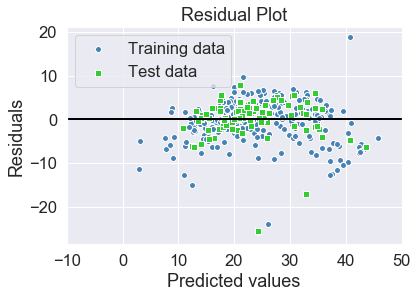

MSE train: 19.375, test: 19.558
R^2 train: 0.756, test: 0.718


In [81]:
#read housing2 data which contains 13 noises
df = pd.read_csv('housing2.csv')
df = df.dropna()
X, y = df.iloc[:,0:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
lng.fit(X,y)
y_test_pred = lng.predict(X_test)
y_train_pred = lng.predict(X_train)
print('Coefficients:',lng.coef_)
print('Intercept: %.3f' % lng.intercept_)
#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Residual Plot')
plt.show()
#calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#by adding the noises, performance actually becomes better...

Coefficients: [ 2.10281406e+00 -4.00887992e-01  8.01516671e-01  2.22781788e-03
 -4.09499667e-01 -8.71828317e-01 -1.68664129e-01 -6.83763269e-01
 -4.07580999e-01 -7.84335119e-01 -1.32107548e+00  1.05202363e+00
 -1.83244767e-01 -2.63746902e-01  3.64158012e-02  2.53201996e-02
  1.64617695e+00 -6.27445762e+00  5.45518116e+00 -2.77093236e-02
 -1.33496348e+00  2.53967171e-01 -1.05194178e-02 -7.88519417e-01
  1.38422876e-02 -4.65771660e-01]
Intercept: 16.521


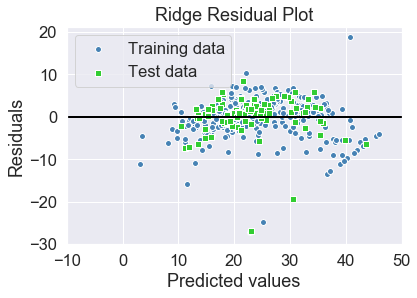

MSE train: 19.182, test: 22.195
R^2 train: 0.758, test: 0.680


In [84]:
#Fit a Ridge model using SKlearn to all of the features of the dataset, alpha = 1
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
print('Coefficients:',ridge.coef_)
print('Intercept: %.3f' % ridge.intercept_)

#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Ridge Residual Plot')
plt.show()

#Calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#We can see R2 are lower than the original linear regression model but MSE are higher
#Means ridge model performs worse than linear regression model on test data at alpha = 1.0

Coefficients: [ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.03215058 -0.          0.         -0.
  2.33638606  0.00720546 -0.67889672  0.18139868 -0.01109164 -0.72577921
  0.0131533  -0.72069113]
Intercept: 30.283


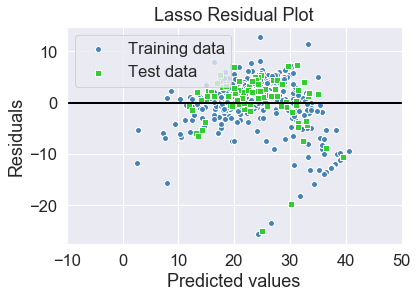

MSE train: 24.198, test: 22.913
R^2 train: 0.695, test: 0.670


In [90]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
print('Coefficients:',lasso.coef_)
print('Intercept: %.3f' % lasso.intercept_)

#plot the residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Lasso Residual Plot')
plt.show()

#Calculate MSE and R2 to evaluate model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
     r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))
#Lasso model performs worse than linear regression model on test data when alpha = 1

In [91]:
print("My name is {Zijie Lin}")
print("My NetID is: {zlin36}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zijie Lin}
My NetID is: {zlin36}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
